In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Clustering algorithms
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.mixture import GaussianMixture
from sklearn.cluster import Birch

# Evaluate accuracy
from sklearn.metrics import accuracy_score

In [ ]:
# Import data

data = pd.read_csv("bank.csv")

In [ ]:
# Selecting features for clustering

X = data[data.columns[0:2]]

y = data["Class"]

In [ ]:
X.plot.scatter(x = "Variance", y = "Skewness")

In [ ]:
def clustering(X,model):
    
    #Convert dataframe --> array
    X = np.array(X)
    
    # Fitting the data
    model.fit(X)
    
    # Predict the clusters
    yhat = model.predict(X)
    
    # Evaluating number of clusters
    clusters = np.unique(yhat)
    
    # Visualization of the clusters
    for cluster in clusters:
        
        # Identifying indices for the clusters
        row_ix = np.where(yhat == cluster)
        
        # Scatter plot for each cluster
        plt.scatter(X[row_ix, 0], X[row_ix, 1])
        
    # Evaluate clustering accuracy
    print('Accuracy: {}'.format(accuracy_score(yhat, y)))
    
    print("Number of clusters = " + str(len(clusters)))
    plt.show()

#### K-means

K-Means Clustering may be the most widely known clustering algorithm and involves assigning examples to clusters in an effort to minimize the variance within each cluster.

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
kmeans = KMeans(n_clusters = 2)

clustering(X, kmeans)

#### Affinity propagation

- Initially ever node(data point) is a cluster
- In each iteration, we merge any clusters closest to it.

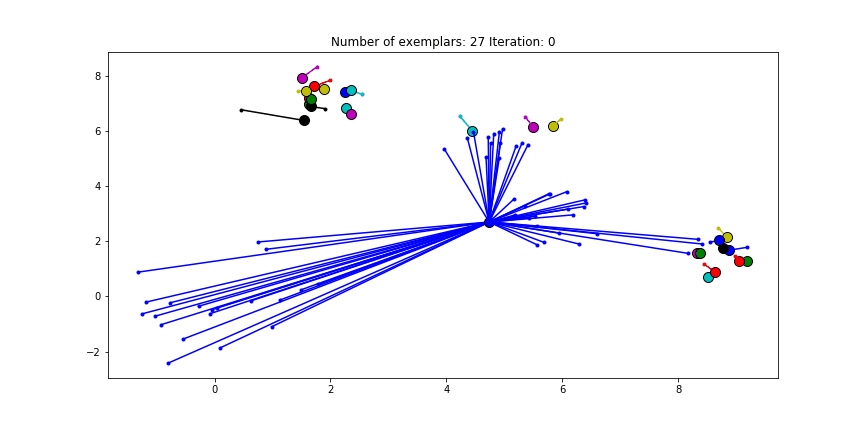

Damping: 0.5 - 1

https://scikit-learn.org/stable/modules/clustering.html#affinity-propagation

In [ ]:
aff = AffinityPropagation(random_state = 0, damping = 0.7)

clustering(X,aff)

#### Gaussian Mixture Model

A Gaussian mixture model summarizes a multivariate probability density function with a mixture of Gaussian probability distributions.

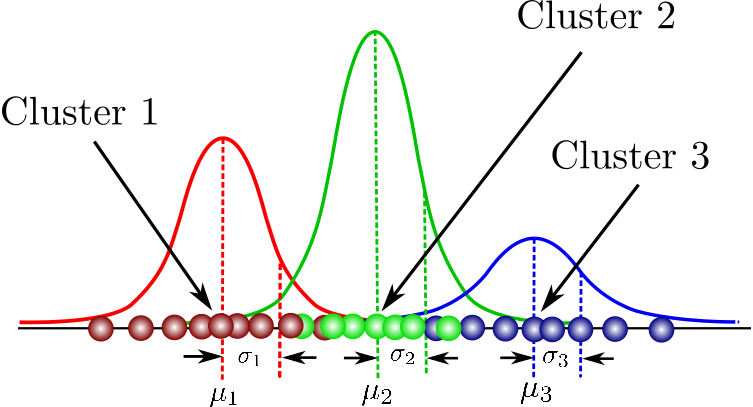

https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

In [ ]:
gmm = GaussianMixture(n_components=2)

clustering(X, gmm)

#### BIRCH

BIRCH Clustering (BIRCH is short for Balanced Iterative Reducing and Clustering using Hierarchies):

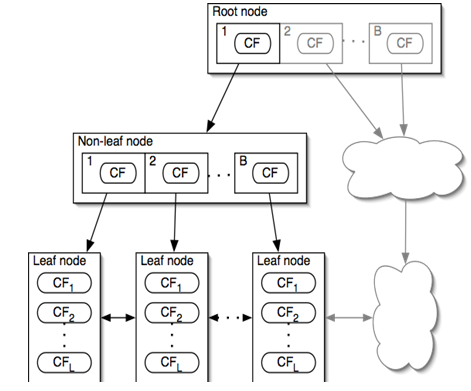

Inital scanning --> Tree condensing --> Global clustering --> Clustering refinement

Drawback - Cannot use categorical variables

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html

In [ ]:
birch = Birch(threshold=0.01, n_clusters=2)

clustering(X, birch)